## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.760075 -1.445878  0.434440 -1.049368 -0.870597 -1.516240
1  0.401720 -0.624560  0.652626  0.743342  1.352011  0.812280
2 -0.201954 -0.953440  0.866680  1.343663  1.268593  0.724160
3  0.248262 -0.107391  1.379942 -0.454586  0.950491  0.784228
4 -1.511019 -0.869133 -1.098347 -0.031765 -0.717090 -1.180272


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0064581	total: 57.8ms	remaining: 57.7s
1:	learn: 0.9936863	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9831799	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9718510	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9616084	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9513781	total: 60.4ms	remaining: 10s
6:	learn: 0.9394389	total: 60.9ms	remaining: 8.64s
7:	learn: 0.9292535	total: 61.6ms	remaining: 7.63s
8:	learn: 0.9193524	total: 62ms	remaining: 6.82s
9:	learn: 0.9101572	total: 62.5ms	remaining: 6.18s
10:	learn: 0.8999320	total: 62.9ms	remaining: 5.65s
11:	learn: 0.8904488	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8795054	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8709896	total: 64.4ms	remaining: 4.53s
14:	learn: 0.8621558	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8537189	total: 65.2ms	remaining: 4.01s
16:	learn: 0.8440266	total: 65.6ms	remaining: 3.79s
17:	learn: 0.8356925	total: 66.1ms	remaining: 3.6s
18:	learn: 0.8258912	total: 66.4ms	remaining: 3.4

111:	learn: 0.3356528	total: 109ms	remaining: 864ms
112:	learn: 0.3326082	total: 109ms	remaining: 859ms
113:	learn: 0.3299017	total: 110ms	remaining: 854ms
114:	learn: 0.3274917	total: 110ms	remaining: 849ms
115:	learn: 0.3242616	total: 111ms	remaining: 843ms
116:	learn: 0.3215352	total: 111ms	remaining: 838ms
117:	learn: 0.3185487	total: 112ms	remaining: 834ms
118:	learn: 0.3160110	total: 112ms	remaining: 830ms
119:	learn: 0.3134358	total: 112ms	remaining: 825ms
120:	learn: 0.3106990	total: 113ms	remaining: 820ms
121:	learn: 0.3080009	total: 113ms	remaining: 815ms
122:	learn: 0.3053110	total: 114ms	remaining: 811ms
123:	learn: 0.3030411	total: 114ms	remaining: 808ms
124:	learn: 0.3005954	total: 115ms	remaining: 804ms
125:	learn: 0.2982491	total: 115ms	remaining: 800ms
126:	learn: 0.2960488	total: 116ms	remaining: 797ms
127:	learn: 0.2936636	total: 117ms	remaining: 794ms
128:	learn: 0.2906021	total: 117ms	remaining: 790ms
129:	learn: 0.2885186	total: 118ms	remaining: 787ms
130:	learn: 

273:	learn: 0.0966266	total: 186ms	remaining: 493ms
274:	learn: 0.0959489	total: 187ms	remaining: 492ms
275:	learn: 0.0953230	total: 187ms	remaining: 490ms
276:	learn: 0.0947145	total: 188ms	remaining: 490ms
277:	learn: 0.0941302	total: 188ms	remaining: 488ms
278:	learn: 0.0935881	total: 188ms	remaining: 487ms
279:	learn: 0.0928599	total: 189ms	remaining: 486ms
280:	learn: 0.0922325	total: 189ms	remaining: 485ms
281:	learn: 0.0916604	total: 190ms	remaining: 483ms
282:	learn: 0.0910352	total: 190ms	remaining: 482ms
283:	learn: 0.0904927	total: 191ms	remaining: 481ms
284:	learn: 0.0897507	total: 191ms	remaining: 480ms
285:	learn: 0.0891777	total: 191ms	remaining: 478ms
286:	learn: 0.0886364	total: 192ms	remaining: 477ms
287:	learn: 0.0879704	total: 192ms	remaining: 475ms
288:	learn: 0.0873869	total: 193ms	remaining: 474ms
289:	learn: 0.0867610	total: 193ms	remaining: 474ms
290:	learn: 0.0861071	total: 194ms	remaining: 473ms
291:	learn: 0.0854403	total: 194ms	remaining: 471ms
292:	learn: 

486:	learn: 0.0280595	total: 291ms	remaining: 307ms
487:	learn: 0.0279153	total: 292ms	remaining: 306ms
488:	learn: 0.0277415	total: 292ms	remaining: 305ms
489:	learn: 0.0276235	total: 293ms	remaining: 305ms
490:	learn: 0.0274837	total: 293ms	remaining: 304ms
491:	learn: 0.0273395	total: 294ms	remaining: 303ms
492:	learn: 0.0272257	total: 294ms	remaining: 303ms
493:	learn: 0.0271417	total: 295ms	remaining: 302ms
494:	learn: 0.0270316	total: 295ms	remaining: 301ms
495:	learn: 0.0269523	total: 296ms	remaining: 300ms
496:	learn: 0.0268638	total: 296ms	remaining: 300ms
497:	learn: 0.0267263	total: 297ms	remaining: 299ms
498:	learn: 0.0265917	total: 297ms	remaining: 298ms
499:	learn: 0.0264600	total: 297ms	remaining: 297ms
500:	learn: 0.0263552	total: 298ms	remaining: 297ms
501:	learn: 0.0262588	total: 298ms	remaining: 296ms
502:	learn: 0.0261702	total: 299ms	remaining: 295ms
503:	learn: 0.0261028	total: 299ms	remaining: 294ms
504:	learn: 0.0260367	total: 299ms	remaining: 294ms
505:	learn: 

650:	learn: 0.0153184	total: 368ms	remaining: 197ms
651:	learn: 0.0152503	total: 369ms	remaining: 197ms
652:	learn: 0.0151737	total: 369ms	remaining: 196ms
653:	learn: 0.0151045	total: 370ms	remaining: 196ms
654:	learn: 0.0150549	total: 370ms	remaining: 195ms
655:	learn: 0.0150401	total: 370ms	remaining: 194ms
656:	learn: 0.0149918	total: 371ms	remaining: 194ms
657:	learn: 0.0149082	total: 371ms	remaining: 193ms
658:	learn: 0.0148413	total: 372ms	remaining: 192ms
659:	learn: 0.0147906	total: 372ms	remaining: 192ms
660:	learn: 0.0147412	total: 373ms	remaining: 191ms
661:	learn: 0.0147270	total: 373ms	remaining: 190ms
662:	learn: 0.0146791	total: 373ms	remaining: 190ms
663:	learn: 0.0146652	total: 374ms	remaining: 189ms
664:	learn: 0.0146186	total: 374ms	remaining: 189ms
665:	learn: 0.0146050	total: 375ms	remaining: 188ms
666:	learn: 0.0145598	total: 375ms	remaining: 187ms
667:	learn: 0.0144907	total: 376ms	remaining: 187ms
668:	learn: 0.0144230	total: 377ms	remaining: 186ms
669:	learn: 

875:	learn: 0.0072396	total: 475ms	remaining: 67.2ms
876:	learn: 0.0072254	total: 476ms	remaining: 66.7ms
877:	learn: 0.0071984	total: 476ms	remaining: 66.2ms
878:	learn: 0.0071695	total: 477ms	remaining: 65.6ms
879:	learn: 0.0071295	total: 477ms	remaining: 65.1ms
880:	learn: 0.0071013	total: 478ms	remaining: 64.5ms
881:	learn: 0.0070785	total: 478ms	remaining: 64ms
882:	learn: 0.0070562	total: 479ms	remaining: 63.4ms
883:	learn: 0.0070253	total: 479ms	remaining: 62.9ms
884:	learn: 0.0069979	total: 480ms	remaining: 62.3ms
885:	learn: 0.0069880	total: 480ms	remaining: 61.8ms
886:	learn: 0.0069607	total: 480ms	remaining: 61.2ms
887:	learn: 0.0069388	total: 481ms	remaining: 60.6ms
888:	learn: 0.0068975	total: 481ms	remaining: 60.1ms
889:	learn: 0.0068922	total: 482ms	remaining: 59.5ms
890:	learn: 0.0068708	total: 482ms	remaining: 59ms
891:	learn: 0.0068304	total: 483ms	remaining: 58.4ms
892:	learn: 0.0068253	total: 483ms	remaining: 57.9ms
893:	learn: 0.0067857	total: 483ms	remaining: 57.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

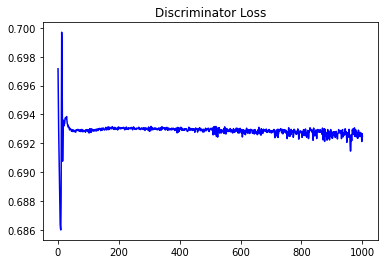

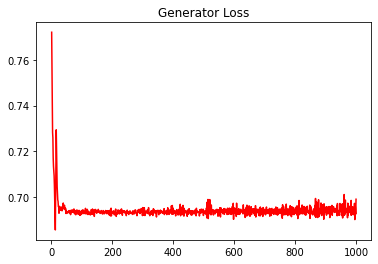

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.046257555426874236


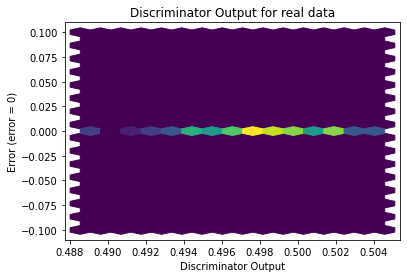

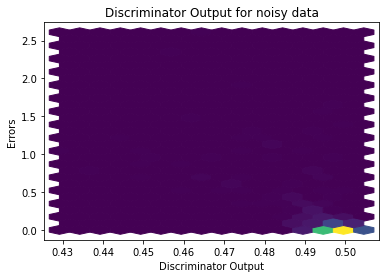

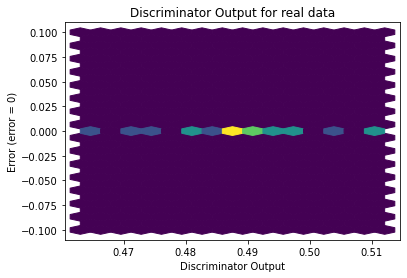

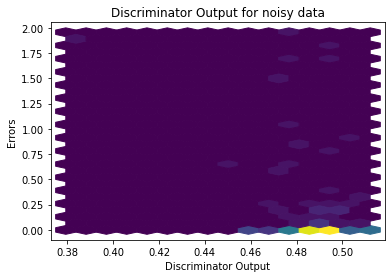

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


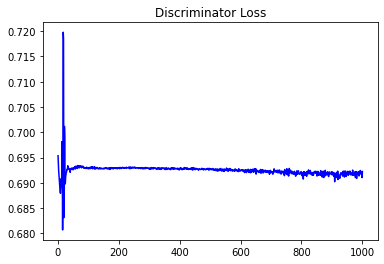

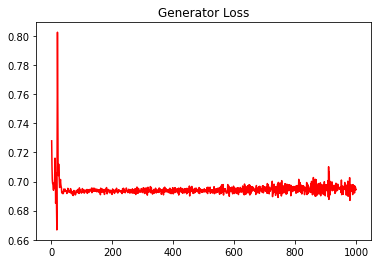

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0639344857479899


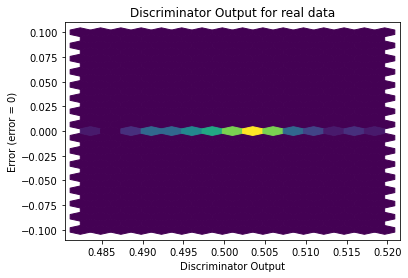

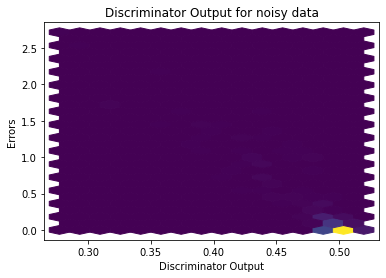

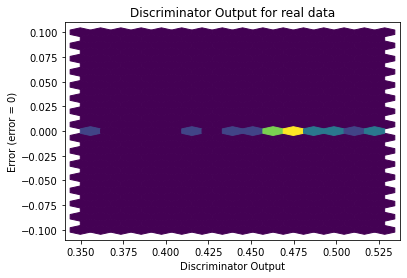

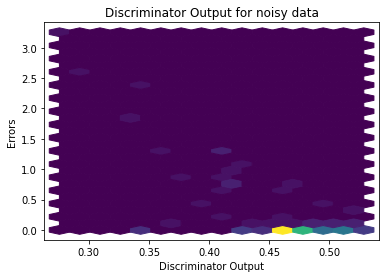

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4630]], requires_grad=True)
